In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=18) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=32, 
                                     learning_rate=1e-4, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=True)

Number of Training Images: 105,400
Number of Validation Images: 26,348


Positivity Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum    18.645853
Cardiomegaly                   7.853423
Lung_Opacity                   1.203361
Lung_Lesion                   22.744087
Edema                          3.329609
Consolidation                 15.700998
Pneumonia                     36.125749
Atelectasis                    5.395243
Pneumothorax                  11.423385
Pleural_Effusion               1.942326
Pleural_Other                 73.330042
Fracture                      21.898110
dtype: float64

In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 968.3743         
Training Time: 0:15:39.388271          
Validation Time: 0:02:38.182907

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.116338,0.585376,0.194100,0.791158,0.364099
4,Edema,24344,0.235376,0.552929,0.330193,0.771282,0.473122
5,Consolidation,6311,0.000000,0.000000,0.000000,0.657931,0.097262
7,Atelectasis,16481,0.000425,0.120690,0.000846,0.612507,0.209252
9,Pleural_Effusion,35822,0.545949,0.663602,0.599053,0.807005,0.668818



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.375170,0.483772,0.422605,0.822111,0.433817
4,Edema,6155,0.249066,0.595571,0.351243,0.797032,0.516454
5,Consolidation,1612,0.000000,0.000000,0.000000,0.682584,0.116186
7,Atelectasis,4137,0.000000,0.000000,0.000000,0.649367,0.238469
9,Pleural_Effusion,8912,0.594255,0.707832,0.646090,0.842285,0.724724


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 922.6324         
Training Time: 0:16:06.526420          
Validation Time: 0:02:46.754981

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.228895,0.636831,0.336752,0.840001,0.462953
4,Edema,24344,0.317573,0.587953,0.412397,0.801884,0.522576
5,Consolidation,6311,0.000000,0.000000,0.000000,0.686595,0.112814
7,Atelectasis,16481,0.000364,0.315789,0.000727,0.648477,0.235085
9,Pleural_Effusion,35822,0.628441,0.707168,0.665484,0.847138,0.732309



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.296939,0.586300,0.394220,0.839066,0.467794
4,Edema,6155,0.239155,0.634209,0.347334,0.812222,0.539135
5,Consolidation,1612,0.000000,0.000000,0.000000,0.704546,0.125823
7,Atelectasis,4137,0.000000,0.000000,0.000000,0.653812,0.245896
9,Pleural_Effusion,8912,0.594592,0.726886,0.654117,0.857283,0.748046


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 900.7239         
Training Time: 0:15:49.756931          
Validation Time: 0:02:39.684526

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.269047,0.645766,0.379840,0.855158,0.495013
4,Edema,24344,0.355036,0.606952,0.448010,0.815617,0.549214
5,Consolidation,6311,0.000000,0.000000,0.000000,0.708161,0.125566
7,Atelectasis,16481,0.000607,0.285714,0.001211,0.664130,0.247615
9,Pleural_Effusion,35822,0.656468,0.720157,0.686839,0.861659,0.755896



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.110544,0.719027,0.191627,0.839978,0.472110
4,Edema,6155,0.269374,0.626369,0.376733,0.815778,0.547828
5,Consolidation,1612,0.000000,0.000000,0.000000,0.720731,0.140613
7,Atelectasis,4137,0.000000,0.000000,0.000000,0.666511,0.254325
9,Pleural_Effusion,8912,0.483842,0.778480,0.596775,0.860479,0.753393


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 881.8387         
Training Time: 0:39:10.123407          
Validation Time: 0:07:14.612983

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.294330,0.654586,0.406073,0.865510,0.516571
4,Edema,24344,0.387898,0.622930,0.478090,0.826128,0.570952
5,Consolidation,6311,0.000000,0.000000,0.000000,0.721175,0.135923
7,Atelectasis,16481,0.002002,0.407407,0.003985,0.679702,0.261392
9,Pleural_Effusion,35822,0.672855,0.727704,0.699205,0.871310,0.770687



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.321769,0.590881,0.416648,0.844074,0.475810
4,Edema,6155,0.430219,0.578924,0.493615,0.817220,0.553253
5,Consolidation,1612,0.000000,0.000000,0.000000,0.719695,0.143209
7,Atelectasis,4137,0.025622,0.375887,0.047975,0.668997,0.257009
9,Pleural_Effusion,8912,0.610189,0.748314,0.672229,0.865669,0.764704


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 856.3185         
Training Time: 0:41:33.441799          
Validation Time: 0:07:14.277946

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.339269,0.674741,0.451512,0.880259,0.556569
4,Edema,24344,0.427785,0.639641,0.512689,0.840626,0.600195
5,Consolidation,6311,0.001268,0.333333,0.002526,0.739394,0.154253
7,Atelectasis,16481,0.007949,0.466192,0.015631,0.697808,0.282992
9,Pleural_Effusion,35822,0.687455,0.740654,0.713063,0.881439,0.789193



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.289116,0.577446,0.385313,0.832067,0.456531
4,Edema,6155,0.255727,0.644026,0.366089,0.816493,0.552368
5,Consolidation,1612,0.000000,0.000000,0.000000,0.717616,0.142079
7,Atelectasis,4137,0.000000,0.000000,0.000000,0.668027,0.255639
9,Pleural_Effusion,8912,0.593806,0.751598,0.663449,0.865857,0.764499


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 811.9882         
Training Time: 0:41:32.284060          
Validation Time: 0:07:13.248661

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.408652,0.700000,0.516043,0.902428,0.615839
4,Edema,24344,0.488128,0.666013,0.563362,0.863645,0.646606
5,Consolidation,6311,0.003486,0.423077,0.006915,0.765127,0.177206
7,Atelectasis,16481,0.030520,0.521784,0.057667,0.726618,0.320823
9,Pleural_Effusion,35822,0.713472,0.759660,0.735842,0.895567,0.814112



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.235374,0.629663,0.342659,0.830974,0.458064
4,Edema,6155,0.490171,0.549045,0.517940,0.805719,0.540226
5,Consolidation,1612,0.001861,0.300000,0.003699,0.702049,0.135652
7,Atelectasis,4137,0.016437,0.336634,0.031344,0.663604,0.250365
9,Pleural_Effusion,8912,0.692998,0.696515,0.694752,0.861164,0.754921


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 734.9775         
Training Time: 0:41:28.959772          
Validation Time: 0:07:14.308481

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.514910,0.745742,0.609193,0.932306,0.704948
4,Edema,24344,0.579075,0.712726,0.638986,0.896145,0.722922
5,Consolidation,6311,0.028046,0.553125,0.053386,0.805576,0.238527
7,Atelectasis,16481,0.108853,0.583415,0.183473,0.771409,0.392975
9,Pleural_Effusion,35822,0.751382,0.786926,0.768743,0.916621,0.851408



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.411224,0.453488,0.431324,0.819320,0.417473
4,Edema,6155,0.390414,0.575018,0.465067,0.796926,0.526904
5,Consolidation,1612,0.009926,0.432432,0.019406,0.687372,0.125006
7,Atelectasis,4137,0.051487,0.289402,0.087420,0.644898,0.231757
9,Pleural_Effusion,8912,0.840776,0.590232,0.693572,0.852835,0.742096


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 624.4665         
Training Time: 0:41:26.094507          
Validation Time: 0:07:13.627249

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.658883,0.804843,0.724585,0.961443,0.815217
4,Edema,24344,0.681605,0.773026,0.724443,0.931793,0.813571
5,Consolidation,6311,0.095547,0.584869,0.164260,0.856966,0.333077
7,Atelectasis,16481,0.253807,0.640975,0.363628,0.830043,0.503842
9,Pleural_Effusion,35822,0.797694,0.825772,0.811490,0.942226,0.896514



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.413265,0.416381,0.414817,0.793747,0.379413
4,Edema,6155,0.475873,0.515760,0.495014,0.791712,0.515939
5,Consolidation,1612,0.016749,0.247706,0.031377,0.686461,0.118135
7,Atelectasis,4137,0.102973,0.279161,0.150450,0.634179,0.227231
9,Pleural_Effusion,8912,0.694120,0.658576,0.675881,0.841082,0.723564


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 495.1140         
Training Time: 0:41:28.961971          
Validation Time: 0:07:13.696017

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.779840,0.863789,0.819671,0.982543,0.905820
4,Edema,24344,0.777399,0.829135,0.802434,0.961212,0.891352
5,Consolidation,6311,0.239265,0.681408,0.354169,0.905506,0.471969
7,Atelectasis,16481,0.435775,0.705155,0.538663,0.889512,0.645105
9,Pleural_Effusion,35822,0.853107,0.870680,0.861804,0.966219,0.939195



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.321429,0.453237,0.376119,0.788968,0.372455
4,Edema,6155,0.242405,0.562594,0.338821,0.769229,0.485812
5,Consolidation,1612,0.057072,0.149837,0.082659,0.660033,0.105359
7,Atelectasis,4137,0.224075,0.243307,0.233296,0.620011,0.218885
9,Pleural_Effusion,8912,0.805768,0.564722,0.664047,0.822324,0.691742


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 373.8493         
Training Time: 0:41:25.806282          
Validation Time: 0:07:13.674075

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.855859,0.898422,0.876624,0.992035,0.950636
4,Edema,24344,0.848546,0.878274,0.863154,0.979970,0.941918
5,Consolidation,6311,0.427508,0.733750,0.540248,0.946430,0.634883
7,Atelectasis,16481,0.613191,0.779543,0.686432,0.938052,0.780949
9,Pleural_Effusion,35822,0.896544,0.905135,0.900819,0.981831,0.967129



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.343197,0.438315,0.384968,0.792018,0.380062
4,Edema,6155,0.221446,0.576078,0.319916,0.760555,0.473405
5,Consolidation,1612,0.109181,0.116866,0.112893,0.617035,0.093949
7,Atelectasis,4137,0.271694,0.221042,0.243765,0.606900,0.206605
9,Pleural_Effusion,8912,0.492370,0.711645,0.582040,0.820659,0.694948


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [11/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 284.0230         
Training Time: 0:41:26.627782          
Validation Time: 0:07:13.671033

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.891474,0.920868,0.905933,0.995366,0.970098
4,Edema,24344,0.888884,0.906611,0.897660,0.987972,0.964265
5,Consolidation,6311,0.593091,0.789829,0.677466,0.973139,0.775967
7,Atelectasis,16481,0.734239,0.831570,0.779879,0.967258,0.873957
9,Pleural_Effusion,35822,0.924153,0.930491,0.927311,0.989585,0.981241



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.436735,0.390511,0.412331,0.790133,0.377240
4,Edema,6155,0.172380,0.584895,0.266282,0.753974,0.466628
5,Consolidation,1612,0.034119,0.136816,0.054618,0.625817,0.096140
7,Atelectasis,4137,0.083635,0.229900,0.122652,0.587983,0.198849
9,Pleural_Effusion,8912,0.559919,0.669170,0.609689,0.812859,0.676428


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [12/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 223.6269         
Training Time: 0:41:25.555980          
Validation Time: 0:07:13.752001

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.909366,0.931990,0.920539,0.996547,0.977726
4,Edema,24344,0.913572,0.925240,0.919369,0.992345,0.977018
5,Consolidation,6311,0.725875,0.845983,0.781341,0.986739,0.872128
7,Atelectasis,16481,0.813118,0.874168,0.842539,0.981648,0.925616
9,Pleural_Effusion,35822,0.939814,0.943580,0.941693,0.993033,0.987225



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.358503,0.412041,0.383412,0.780913,0.363381
4,Edema,6155,0.495207,0.444185,0.468311,0.746579,0.453723
5,Consolidation,1612,0.041563,0.145969,0.064703,0.633953,0.097148
7,Atelectasis,4137,0.058013,0.237859,0.093276,0.600737,0.207217
9,Pleural_Effusion,8912,0.632294,0.657603,0.644700,0.819495,0.691094


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [13/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 187.8633         
Training Time: 0:41:23.180369          
Validation Time: 0:07:13.455637

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.924486,0.943506,0.933899,0.997475,0.983290
4,Edema,24344,0.925608,0.936028,0.930789,0.993971,0.981890
5,Consolidation,6311,0.792267,0.877039,0.832501,0.991760,0.915765
7,Atelectasis,16481,0.854378,0.897336,0.875330,0.987891,0.949533
9,Pleural_Effusion,35822,0.947658,0.952016,0.949832,0.994699,0.990284



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.356463,0.406832,0.379985,0.782777,0.363660
4,Edema,6155,0.489196,0.476877,0.482958,0.761088,0.475154
5,Consolidation,1612,0.251861,0.102293,0.145494,0.618383,0.093386
7,Atelectasis,4137,0.197728,0.216402,0.206644,0.601071,0.203405
9,Pleural_Effusion,8912,0.627917,0.653586,0.640494,0.819817,0.689610


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [14/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 166.2754         
Training Time: 0:41:27.070839          
Validation Time: 0:07:13.242238

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.929273,0.944103,0.936630,0.997609,0.984341
4,Edema,24344,0.933372,0.941727,0.937531,0.994973,0.984772
5,Consolidation,6311,0.840913,0.906869,0.872647,0.994475,0.943509
7,Atelectasis,16481,0.874947,0.906690,0.890536,0.990733,0.959824
9,Pleural_Effusion,35822,0.953716,0.957055,0.955382,0.995626,0.992050



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.371429,0.418872,0.393726,0.786276,0.368113
4,Edema,6155,0.373193,0.513296,0.432173,0.756578,0.473097
5,Consolidation,1612,0.029156,0.137830,0.048131,0.625727,0.093021
7,Atelectasis,4137,0.216582,0.219985,0.218270,0.599133,0.205273
9,Pleural_Effusion,8912,0.567886,0.682627,0.619993,0.816262,0.690122


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [15/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 148.7449         
Training Time: 0:41:27.541609          
Validation Time: 0:07:13.802703

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.939605,0.952811,0.946162,0.998269,0.988301
4,Edema,24344,0.938794,0.946963,0.942861,0.995769,0.987267
5,Consolidation,6311,0.865790,0.913560,0.889034,0.996173,0.956968
7,Atelectasis,16481,0.891208,0.920416,0.905577,0.992698,0.967968
9,Pleural_Effusion,35822,0.958824,0.960997,0.959909,0.996392,0.993517



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.416667,0.384615,0.400000,0.780002,0.356661
4,Edema,6155,0.536962,0.440080,0.483718,0.743270,0.453385
5,Consolidation,1612,0.196030,0.101282,0.133559,0.620352,0.091089
7,Atelectasis,4137,0.108774,0.235849,0.148883,0.599224,0.206698
9,Pleural_Effusion,8912,0.488667,0.704465,0.577050,0.809181,0.679379


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [16/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 138.0605         
Training Time: 0:41:25.516003          
Validation Time: 0:07:13.415761

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.941033,0.954340,0.947640,0.998260,0.988503
4,Edema,24344,0.942902,0.950555,0.946713,0.996224,0.988553
5,Consolidation,6311,0.879258,0.918253,0.898333,0.996683,0.963081
7,Atelectasis,16481,0.902919,0.927570,0.915078,0.994157,0.974307
9,Pleural_Effusion,35822,0.960918,0.963500,0.962207,0.996817,0.994104



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.401020,0.408807,0.404876,0.785121,0.373347
4,Edema,6155,0.564582,0.446543,0.498673,0.758773,0.474434
5,Consolidation,1612,0.041563,0.126177,0.062529,0.621975,0.090593
7,Atelectasis,4137,0.195794,0.233094,0.212822,0.603957,0.206963
9,Pleural_Effusion,8912,0.615799,0.673126,0.643188,0.826111,0.696267


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [17/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 126.5832         
Training Time: 0:41:26.502451          
Validation Time: 0:07:14.435019

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.944225,0.957822,0.950975,0.998644,0.990706
4,Edema,24344,0.946968,0.953115,0.950032,0.996794,0.990408
5,Consolidation,6311,0.892093,0.928736,0.910046,0.997382,0.969830
7,Atelectasis,16481,0.910260,0.931975,0.920990,0.994667,0.976927
9,Pleural_Effusion,35822,0.963067,0.965061,0.964063,0.997202,0.994814



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.414966,0.385466,0.399672,0.783383,0.364140
4,Edema,6155,0.532250,0.448276,0.486667,0.749911,0.465071
5,Consolidation,1612,0.011166,0.216867,0.021239,0.623070,0.094543
7,Atelectasis,4137,0.363548,0.205858,0.262868,0.595439,0.202944
9,Pleural_Effusion,8912,0.691315,0.617458,0.652303,0.814992,0.685833


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [18/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 118.6829         
Training Time: 0:41:26.665013          
Validation Time: 0:07:13.668076

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.948845,0.961035,0.954901,0.998670,0.991045
4,Edema,24344,0.948570,0.956349,0.952444,0.996985,0.990973
5,Consolidation,6311,0.904453,0.936045,0.919977,0.997864,0.975594
7,Atelectasis,16481,0.915903,0.938394,0.927012,0.995547,0.980200
9,Pleural_Effusion,35822,0.966306,0.967900,0.967102,0.997456,0.995332



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.253401,0.469144,0.329064,0.770835,0.353095
4,Edema,6155,0.609261,0.411726,0.491384,0.743193,0.448452
5,Consolidation,1612,0.031638,0.103870,0.048502,0.610080,0.087635
7,Atelectasis,4137,0.153976,0.230964,0.184772,0.600067,0.207807
9,Pleural_Effusion,8912,0.630610,0.643905,0.637188,0.810824,0.685987


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [19/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 113.2838         
Training Time: 0:41:23.661290          
Validation Time: 0:07:13.844697

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.948845,0.959076,0.953933,0.998578,0.990578
4,Edema,24344,0.952596,0.958344,0.955461,0.997481,0.992276
5,Consolidation,6311,0.909365,0.936674,0.922817,0.997794,0.975674
7,Atelectasis,16481,0.922881,0.939991,0.931358,0.996056,0.981854
9,Pleural_Effusion,35822,0.968427,0.969971,0.969198,0.997803,0.995876



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.330612,0.429898,0.373774,0.781435,0.362969
4,Edema,6155,0.475711,0.464836,0.470210,0.744674,0.458852
5,Consolidation,1612,0.167494,0.113828,0.135542,0.629625,0.094361
7,Atelectasis,4137,0.173072,0.229047,0.197164,0.602494,0.206237
9,Pleural_Effusion,8912,0.548137,0.706742,0.617417,0.825633,0.701844


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [20/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 106.1940         
Training Time: 0:41:26.455548          
Validation Time: 0:07:13.564346

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,11905,0.956321,0.961815,0.959060,0.998886,0.992467
4,Edema,24344,0.954855,0.959388,0.957116,0.997562,0.992521
5,Consolidation,6311,0.919347,0.947420,0.933172,0.998419,0.981127
7,Atelectasis,16481,0.927250,0.944499,0.935795,0.996362,0.983781
9,Pleural_Effusion,35822,0.969432,0.970191,0.969811,0.997975,0.996263



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2940,0.351701,0.417609,0.381832,0.775967,0.362065
4,Edema,6155,0.428270,0.491241,0.457599,0.756430,0.472606
5,Consolidation,1612,0.043424,0.141988,0.066508,0.620886,0.094961
7,Atelectasis,4137,0.112884,0.243483,0.154253,0.602322,0.207862
9,Pleural_Effusion,8912,0.570130,0.670317,0.616178,0.810178,0.684380



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.864924
Hamming Loss,0.012100
Combined Recall,0.764803
Combined Precision,0.768836
Combined F1,0.761113


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,5365,0.916869,0.944146,0.930307,0.998405,0.979883
1,Cardiomegaly,11905,0.956321,0.961815,0.959060,0.998886,0.992467
2,Lung_Opacity,47836,0.960887,0.961993,0.961440,0.994787,0.993948
3,Lung_Lesion,4439,0.915747,0.940102,0.927764,0.998781,0.979993
4,Edema,24344,0.954855,0.959388,0.957116,0.997562,0.992521
5,Consolidation,6311,0.919347,0.947420,0.933172,0.998419,0.981127
6,Pneumonia,2839,0.884819,0.936964,0.910145,0.998212,0.966153
7,Atelectasis,16481,0.927250,0.944499,0.935795,0.996362,0.983781
8,Pneumothorax,8484,0.941301,0.956636,0.948907,0.998886,0.989725
9,Pleural_Effusion,35822,0.969432,0.970191,0.969811,0.997975,0.996263


***** ROC *****


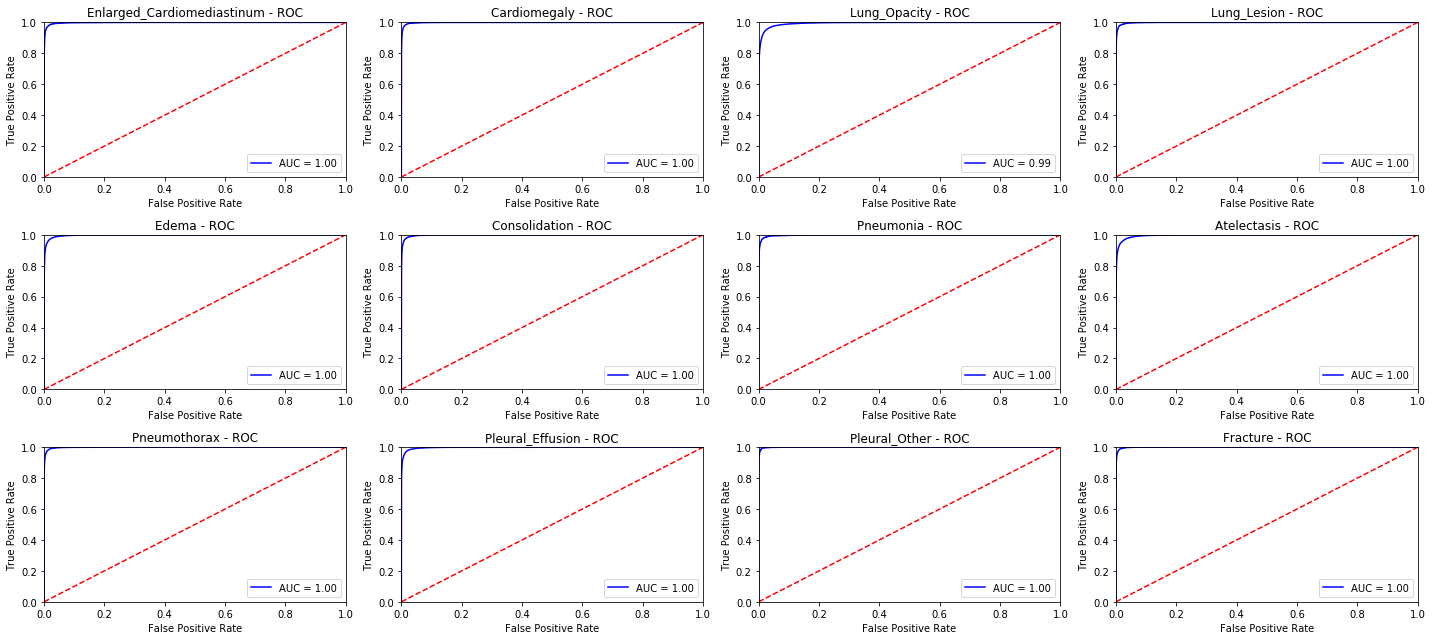

***** Precision / Recall *****


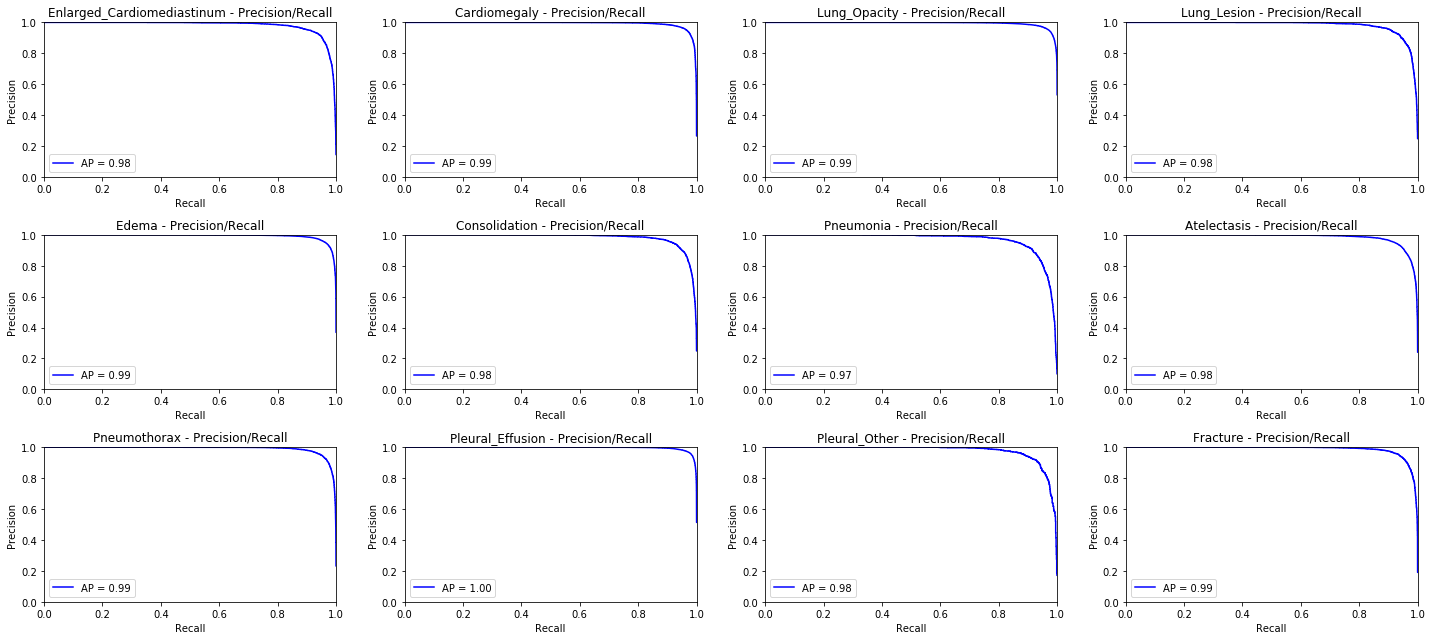


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.183543
Hamming Loss,0.134776
Combined Recall,0.297765
Combined Precision,0.346250
Combined F1,0.296717


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1423,0.052706,0.162338,0.079576,0.605265,0.089207
1,Cardiomegaly,2940,0.351701,0.417609,0.381832,0.775967,0.362065
2,Lung_Opacity,12030,0.527182,0.568891,0.547243,0.639303,0.569436
3,Lung_Lesion,1103,0.125113,0.103293,0.113161,0.644821,0.072608
4,Edema,6155,0.428270,0.491241,0.457599,0.756430,0.472606
5,Consolidation,1612,0.043424,0.141988,0.066508,0.620886,0.094961
6,Pneumonia,672,0.013393,0.087379,0.023226,0.615383,0.041726
7,Atelectasis,4137,0.112884,0.243483,0.154253,0.602322,0.207862
8,Pneumothorax,2124,0.160075,0.353430,0.220350,0.734457,0.227574
9,Pleural_Effusion,8912,0.570130,0.670317,0.616178,0.810178,0.684380


***** ROC *****


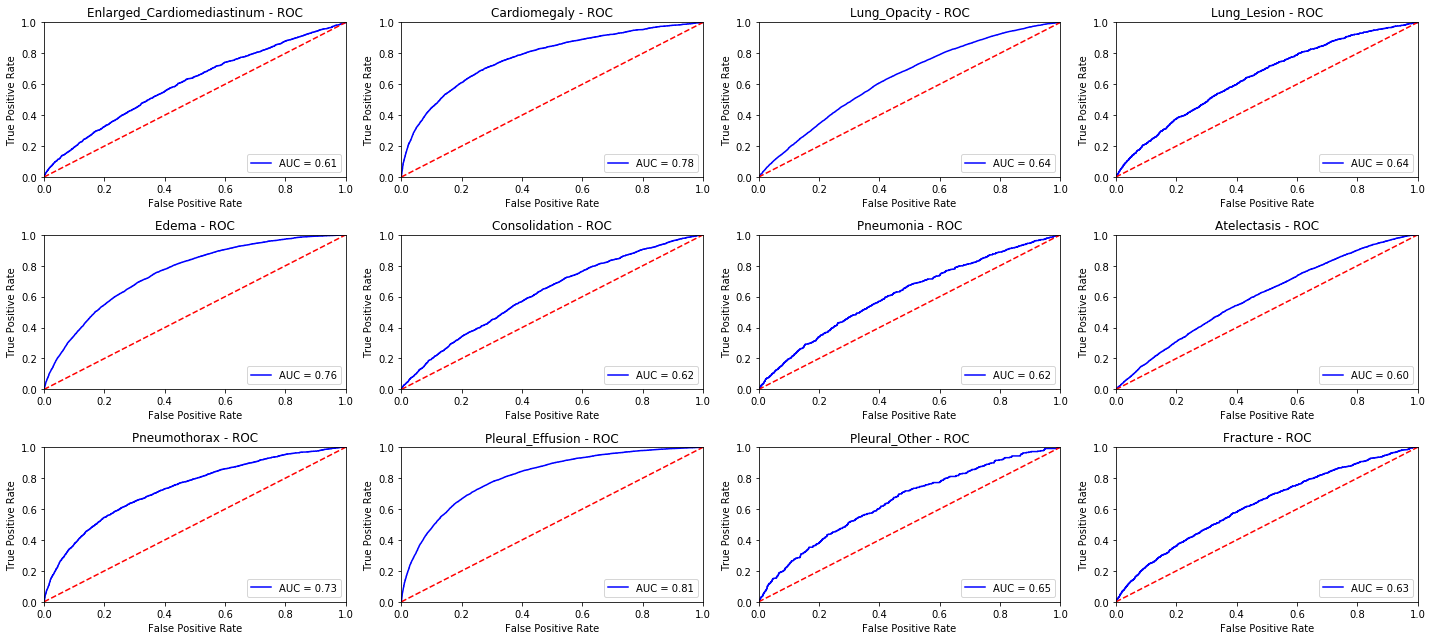

***** Precision / Recall *****


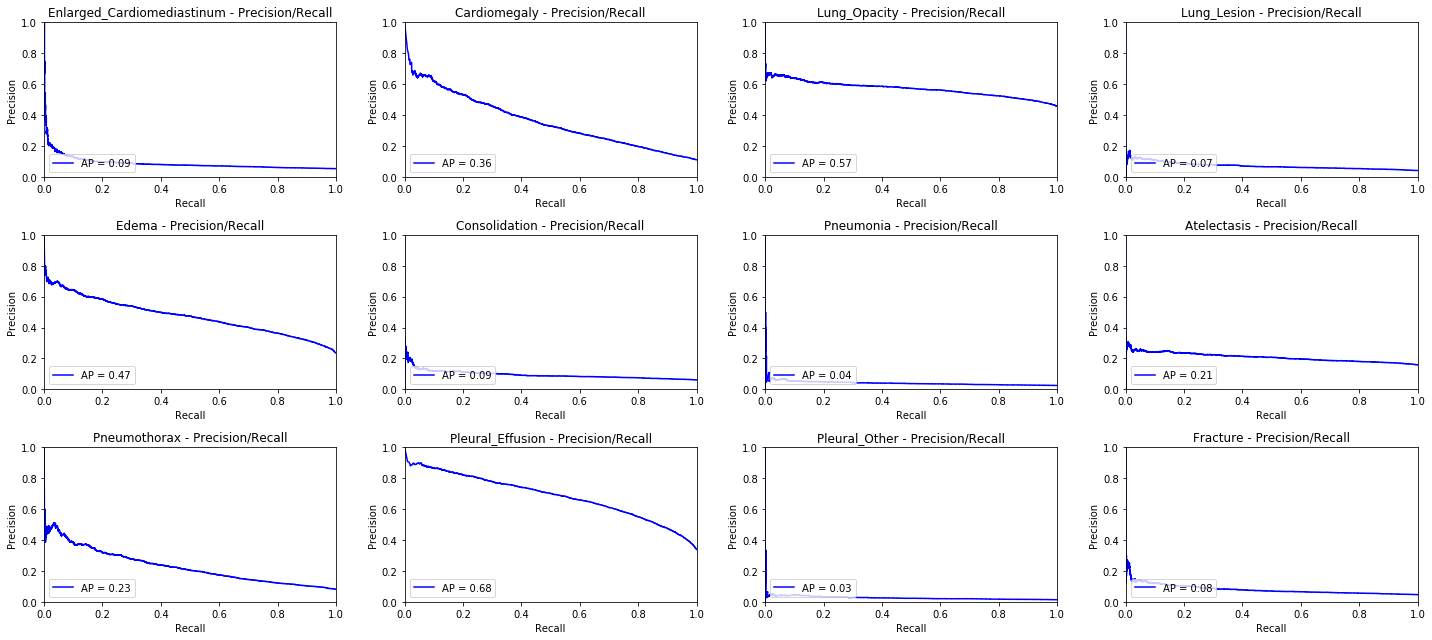

In [7]:
standardTraining.displayMetrics()